In [18]:
from AD_analysis import *
import Atmospheric_diffraction as atm_shift
import numpy as np
import matplotlib as mpl
import Integ_analysis as int_analysis

In [19]:
def plot_integ_trans(aperture_centres,guide,analysis,parallatic=True):  
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_centres,guide,parallatic)
    

# +Y = 1st Observation HA

[1.   1.25 1.5  1.75 2.  ]
Target goes below Horizon above/below HA of +/- 6.0h
Centred at HA = 1.5
SHIFTS FROM CENTRE ARE EQUAL!


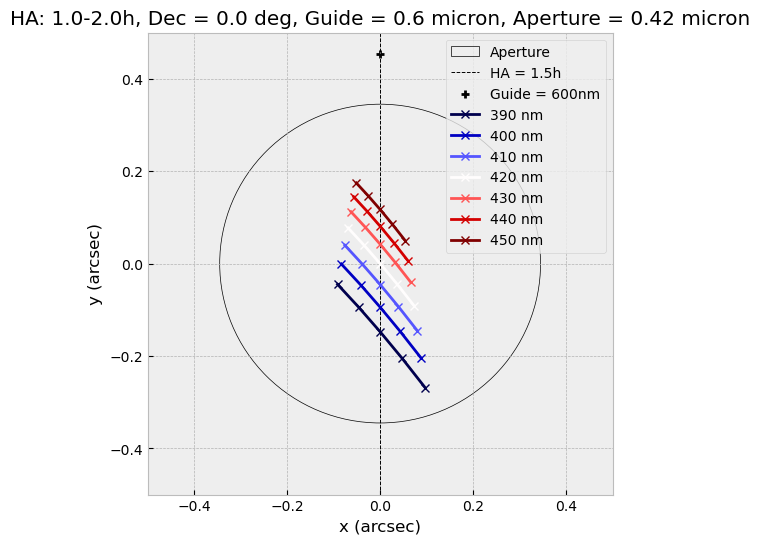

In [20]:
HA_range=np.linspace(1,2,5)
print(HA_range)
aperture=.42*u.micron
guide=.6 * u.micron
targ_dec=0*u.deg

analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=10*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture,centring_index=2)

weights = np.arange(0, len(analysis.output['wavelengths']))
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='seismic')
fig, ax = plt.subplots(figsize=[6,6]) 
circle1 = plt.Circle((0, 0), analysis.output['aperture_diameter'].value/2, color='black', fill=False, label='Aperture')
ax.add_patch(circle1)    
plt.axvline(0,color='black',linestyle='--',linewidth=0.7,label="HA = {}h".format(analysis.input['HA_range'][analysis.input['centring_index']]))

d = analysis.output['shifts']
s=analysis.output['shifts_no_para']
c = analysis.output['centre_shift']
plt.scatter(0,-c,label='Guide = {}nm'.format(round(analysis.input['guide_waveref'].value*1000)),color='black',marker='+')
xs=[]
ys=[]
for count,q in enumerate(analysis.output['delta_para_angles']):
    x=(s[count]+c)*np.sin(q)
    y=(s[count]+c)*np.cos(q)-c
    xs.append(x)
    ys.append(y)
    
xs_new=[]
ys_new=[]
not_equal=0
for i in range(0,len(xs[0])):
    x_new=[]
    y_new=[]
    for o in range(0,len(xs)):
        x_new.append(xs[o][i].value)
        y_new.append(ys[o][i].value)
        
        if round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5) != round(abs(d[o][i]).value,5):
            print(round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5))
            print(round(abs(d[o][i]).value,5))
            print("NOT EQUAL")
            not_equal=1
            
    xs_new.append(x_new)
    ys_new.append(y_new)

for i in range(0,len(xs_new)):
    plt.plot(xs_new[i],np.array(ys_new[i]),marker='x',color=cmap.to_rgba(i),label="%2.0f nm" %(round(analysis.output['wavelengths'][i].value,0)))

plt.ylim(-0.5,0.5)
plt.xlim(-0.5,0.5)
plt.legend()
plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Aperture = {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,aperture))
plt.xlabel("x (arcsec)")
plt.ylabel("y (arcsec)")

if not_equal==0:
    print("SHIFTS FROM CENTRE ARE EQUAL!")       

[1.   1.25 1.5  1.75 2.  ]
Target goes below Horizon above/below HA of +/- 6.0h
Centred at HA = 1.5
SHIFTS FROM CENTRE ARE EQUAL!


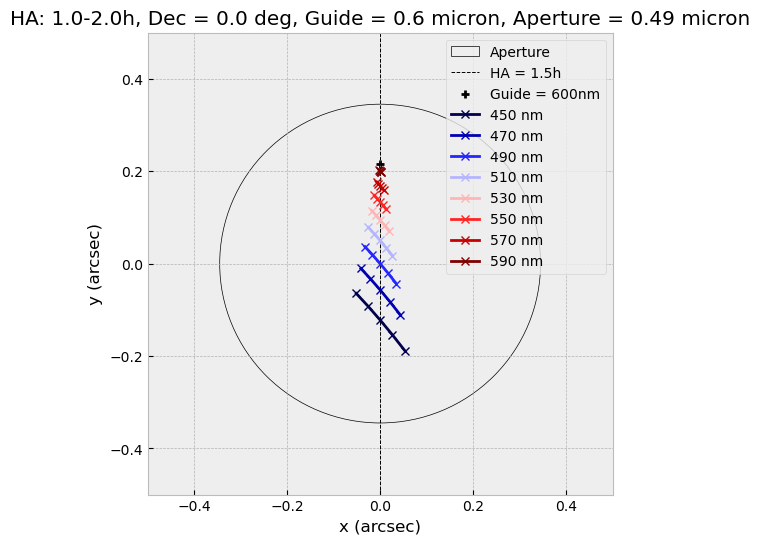

In [21]:
HA_range=np.linspace(1,2,5)
print(HA_range)
aperture=.49*u.micron
guide=.6 * u.micron
targ_dec=0*u.deg

analysis=AD_analysis()
analysis.load_band('LR','VIS','V','V',sampling=20*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture,centring_index=2)

weights = np.arange(0, len(analysis.output['wavelengths']))
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='seismic')
fig, ax = plt.subplots(figsize=[6,6]) 
circle1 = plt.Circle((0, 0), analysis.output['aperture_diameter'].value/2, color='black', fill=False, label='Aperture')
ax.add_patch(circle1)    
plt.axvline(0,color='black',linestyle='--',linewidth=0.7,label="HA = {}h".format(analysis.input['HA_range'][analysis.input['centring_index']]))

d = analysis.output['shifts']
s=analysis.output['shifts_no_para']
c = analysis.output['centre_shift']
plt.scatter(0,-c,label='Guide = {}nm'.format(round(analysis.input['guide_waveref'].value*1000)),color='black',marker='+')
xs=[]
ys=[]
for count,q in enumerate(analysis.output['delta_para_angles']):
    x=(s[count]+c)*np.sin(q)
    y=(s[count]+c)*np.cos(q)-c
    xs.append(x)
    ys.append(y)
    
xs_new=[]
ys_new=[]
not_equal=0
for i in range(0,len(xs[0])):
    x_new=[]
    y_new=[]
    for o in range(0,len(xs)):
        x_new.append(xs[o][i].value)
        y_new.append(ys[o][i].value)
        
        if round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5) != round(abs(d[o][i]).value,5):
            print(round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5))
            print(round(abs(d[o][i]).value,5))
            print("NOT EQUAL")
            not_equal=1
            
    xs_new.append(x_new)
    ys_new.append(y_new)

for i in range(0,len(xs_new)):
    plt.plot(xs_new[i],np.array(ys_new[i]),marker='x',color=cmap.to_rgba(i),label="%2.0f nm" %(round(analysis.output['wavelengths'][i].value,0)))

plt.ylim(-0.5,0.5)
plt.xlim(-0.5,0.5)
plt.legend()
plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Aperture = {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,aperture))
plt.xlabel("x (arcsec)")
plt.ylabel("y (arcsec)")

if not_equal==0:
    print("SHIFTS FROM CENTRE ARE EQUAL!")       

[1.   1.25 1.5  1.75 2.  ]
Target goes below Horizon above/below HA of +/- 6.0h
Centred at HA = 1.75
SHIFTS FROM CENTRE ARE EQUAL!


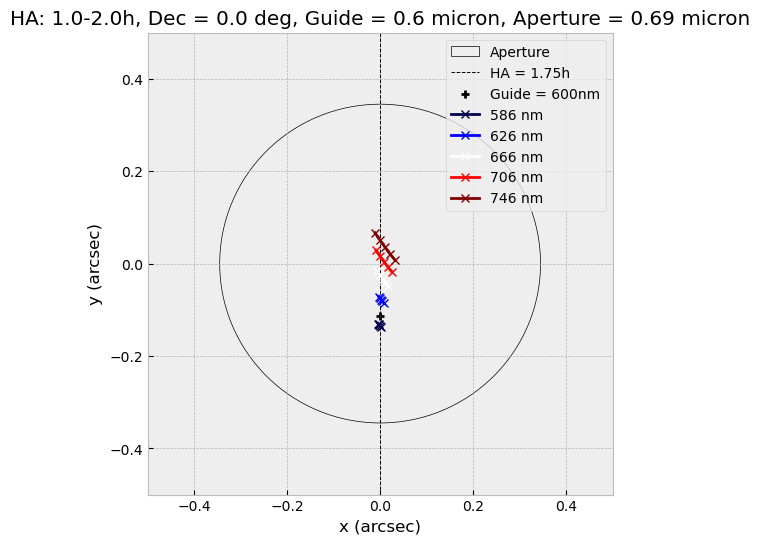

In [22]:
HA_range=np.linspace(1,2,5)
print(HA_range)
aperture=.69*u.micron
guide=.6 * u.micron
targ_dec=0*u.deg

analysis=AD_analysis()
analysis.load_band('LR','VIS','R','R',sampling=40*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture,centring_index=3)

weights = np.arange(0, len(analysis.output['wavelengths']))
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='seismic')
fig, ax = plt.subplots(figsize=[6,6]) 
circle1 = plt.Circle((0, 0), analysis.output['aperture_diameter'].value/2, color='black', fill=False, label='Aperture')
ax.add_patch(circle1)    
plt.axvline(0,color='black',linestyle='--',linewidth=0.7,label="HA = {}h".format(analysis.input['HA_range'][analysis.input['centring_index']]))

d = analysis.output['shifts']
s=analysis.output['shifts_no_para']
c = analysis.output['centre_shift']
plt.scatter(0,-c,label='Guide = {}nm'.format(round(analysis.input['guide_waveref'].value*1000)),color='black',marker='+')
xs=[]
ys=[]
for count,q in enumerate(analysis.output['delta_para_angles']):
    x=(s[count]+c)*np.sin(q)
    y=(s[count]+c)*np.cos(q)-c
    xs.append(x)
    ys.append(y)
    
xs_new=[]
ys_new=[]
not_equal=0
for i in range(0,len(xs[0])):
    x_new=[]
    y_new=[]
    for o in range(0,len(xs)):
        x_new.append(xs[o][i].value)
        y_new.append(ys[o][i].value)
        
        if round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5) != round(abs(d[o][i]).value,5):
            print(round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5))
            print(round(abs(d[o][i]).value,5))
            print("NOT EQUAL")
            not_equal=1
            
    xs_new.append(x_new)
    ys_new.append(y_new)

for i in range(0,len(xs_new)):
    plt.plot(xs_new[i],np.array(ys_new[i]),marker='x',color=cmap.to_rgba(i),label="%2.0f nm" %(round(analysis.output['wavelengths'][i].value,0)))

plt.ylim(-0.5,0.5)
plt.xlim(-0.5,0.5)
plt.legend()
plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Aperture = {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,aperture))
plt.xlabel("x (arcsec)")
plt.ylabel("y (arcsec)")

if not_equal==0:
    print("SHIFTS FROM CENTRE ARE EQUAL!")       

[1.   1.25 1.5  1.75 2.  ]
Target goes below Horizon above/below HA of +/- 6.0h
Centred at HA = 1.5
SHIFTS FROM CENTRE ARE EQUAL!


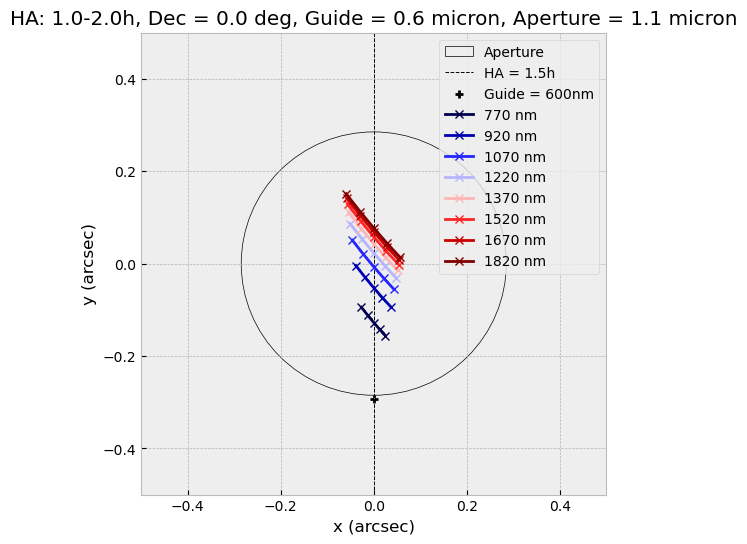

In [25]:
HA_range=np.linspace(1,2,5)
print(HA_range)
aperture=1.1*u.micron
guide=.6 * u.micron
targ_dec=0*u.deg

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=150*u.nm) #Change for wanted observing mode
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture,centring_index=2)

weights = np.arange(0, len(analysis.output['wavelengths']))
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='seismic')
fig, ax = plt.subplots(figsize=[6,6]) 
circle1 = plt.Circle((0, 0), analysis.output['aperture_diameter'].value/2, color='black', fill=False, label='Aperture')
ax.add_patch(circle1)    
plt.axvline(0,color='black',linestyle='--',linewidth=0.7,label="HA = {}h".format(analysis.input['HA_range'][analysis.input['centring_index']]))

d = analysis.output['shifts']
s=analysis.output['shifts_no_para']
c = analysis.output['centre_shift']
plt.scatter(0,-c,label='Guide = {}nm'.format(round(analysis.input['guide_waveref'].value*1000)),color='black',marker='+')
xs=[]
ys=[]
for count,q in enumerate(analysis.output['delta_para_angles']):
    x=(s[count]+c)*np.sin(q)
    y=(s[count]+c)*np.cos(q)-c
    xs.append(x)
    ys.append(y)
    
xs_new=[]
ys_new=[]
not_equal=0
for i in range(0,len(xs[0])):
    x_new=[]
    y_new=[]
    for o in range(0,len(xs)):
        x_new.append(xs[o][i].value)
        y_new.append(ys[o][i].value)
        
        if round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5) != round(abs(d[o][i]).value,5):
            print(round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5))
            print(round(abs(d[o][i]).value,5))
            print("NOT EQUAL")
            not_equal=1
            
    xs_new.append(x_new)
    ys_new.append(y_new)

for i in range(0,len(xs_new)):
    plt.plot(xs_new[i],np.array(ys_new[i]),marker='x',color=cmap.to_rgba(i),label="%2.0f nm" %(round(analysis.output['wavelengths'][i].value,0)))

plt.ylim(-0.5,0.5)
plt.xlim(-0.5,0.5)
plt.legend()
plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Aperture = {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,aperture))
plt.xlabel("x (arcsec)")
plt.ylabel("y (arcsec)")

if not_equal==0:
    print("SHIFTS FROM CENTRE ARE EQUAL!")       

# +Y = 0 PA

[-2. -1.  0.  1.  2.]
Target goes below Horizon above/below HA of +/- 6.0h
Centred at HA = 0.0
SHIFTS FROM CENTRE ARE EQUAL!


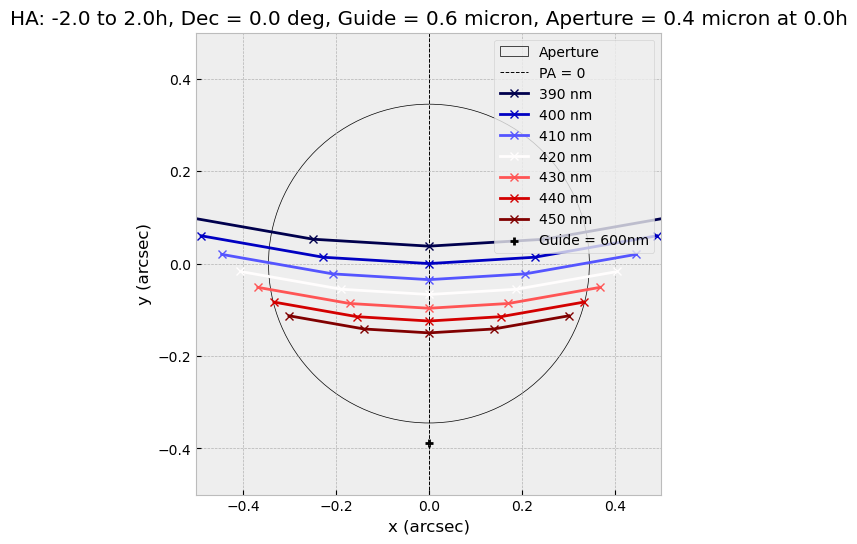

In [17]:
HA_range=np.linspace(-2,2,5)
print(HA_range)
aperture=.4*u.micron
guide=.6 * u.micron
targ_dec=0*u.deg
centring=2
analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=10*u.nm) #Change for wanted observing mode
weights = np.arange(0, len(analysis.output['wavelengths']))
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='seismic')

fig, ax = plt.subplots(figsize=[6,6]) 
circle1 = plt.Circle((0, 0), analysis.output['aperture_diameter'].value/2, color='black', fill=False, label='Aperture')
ax.add_patch(circle1)    
plt.axvline(0,color='black',linestyle='--',linewidth=0.7,label="PA = 0")


analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture,centring_index=centring)

d = analysis.output['shifts']
s=analysis.output['shifts_no_para']
c = analysis.output['centre_shift']

xs=[]
ys=[]
for count,q in enumerate(analysis.output['raw_para_angles']):
    if targ_dec.value > analysis.conditions['latitude'].value:
        x=(s[count]+c)*np.sin(q)-c*np.sin(analysis.output['raw_para_angles'][centring])
        y=(s[count]+c)*np.cos(q)-c*np.cos(analysis.output['raw_para_angles'][centring])
        xs.append(x)
        ys.append(y)
    elif targ_dec.value < analysis.conditions['latitude'].value:
        x=(s[count]+c)*np.sin(q)-c*np.sin(analysis.output['raw_para_angles'][centring])
        y=(s[count]+c)*np.cos(q)-c*np.cos(analysis.output['raw_para_angles'][centring])
        xs.append(x)
        ys.append(y)
        
xs_new=[]
ys_new=[]
not_equal=0
for i in range(0,len(xs[0])):
    x_new=[]
    y_new=[]
    for o in range(0,len(xs)):
        x_new.append(xs[o][i].value)
        y_new.append(ys[o][i].value)
        
        if round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5) != round(abs(d[o][i]).value,5):
            print(round(abs(np.sqrt(xs[o][i].value**2+ys[o][i].value**2)),5))
            print(round(abs(d[o][i]).value,5))
            print("NOT EQUAL")
            not_equal=1
            
    xs_new.append(x_new)
    ys_new.append(y_new)

for i in range(0,len(xs_new)):
    plt.plot(xs_new[i],np.array(ys_new[i]),marker='x',color=cmap.to_rgba(i),label="%2.0f nm" %(round(analysis.output['wavelengths'][i].value,0)))
  
plt.ylim(-0.5,0.5)
plt.xlim(-0.5,0.5)
plt.scatter(-c*np.sin(analysis.output['raw_para_angles'][centring]),-c*np.cos(analysis.output['raw_para_angles'][centring]),label='Guide = {}nm'.format(round(analysis.input['guide_waveref'].value*1000)),color='black',marker='+')

plt.legend()
plt.title("HA: {} to {}h, Dec = {}, Guide = {}, Aperture = {} at {}h".format(HA_range[0],HA_range[-1],analysis.input['targ_dec'],guide,aperture,HA_range[centring]))
plt.xlabel("x (arcsec)")
plt.ylabel("y (arcsec)")

if not_equal==0:
    print("SHIFTS FROM CENTRE ARE EQUAL!")